In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob,os
import cmocean as cm

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cftime as cft

import gsw as gsw

In [11]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41745/status,
Dashboard: /proxy/41745/status,Workers: 4
Total threads: 8,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46773,Workers: 4
Dashboard: /proxy/41745/status,Total threads: 8
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:33717,Total threads: 2
Dashboard: /proxy/34453/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:33143,


In [12]:
def gcdist(lat1, lat2, lon1, lon2):
    # Radius of the Earth in m
    r = 6371000
    # Difference between points (lon/lat)
    dlon = lon2-lon1
    dlat = lat2-lat1
    # Calculate distance in km
    gcdist = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([lat1,lat2]))))**2))

    return gcdist

In [13]:
# /g/data/v45/pas561/RG_Argo
rgargo_1921=xr.open_mfdataset('/g/data/jk72/mxr581/SOTS-project-data/RG_Argo/*9.nc',engine='netcdf4',combine='nested',concat_dim='TIME',decode_times=False)
rgargo_1921


<xarray.Dataset> Size: 24MB
Dimensions:                   (TIME: 1, PRESSURE: 58, LATITUDE: 145,
                               LONGITUDE: 360)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 1kB 20.5 21.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 580B -64.5 -63.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 232B 2.5 10.0 ... 1.975e+03
  * TIME                      (TIME) float32 4B 180.5
Data variables:
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 12MB dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 12MB dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>

In [14]:
#get dxt and dyt for area averaging
print(rgargo_1921.LONGITUDE.shape,rgargo_1921.LATITUDE.shape) 
dxt=np.zeros(rgargo_1921.LONGITUDE.shape) 
dyt=np.zeros(rgargo_1921.LATITUDE.shape) 

for i in range(1,rgargo_1921.LATITUDE.shape[0]):
    dyt[i]=gcdist(rgargo_1921.LATITUDE[i-1],rgargo_1921.LATITUDE[i],rgargo_1921.LONGITUDE[i],rgargo_1921.LONGITUDE[i])
dyt[0]=dyt[1]
dyt

(360,) (145,)


array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
      

In [15]:
rg_dyt = xr.DataArray(
    data=dyt,
    dims=["LATITUDE"],
    coords=dict(
        lat=(["LATITUDE"], rgargo_1921.LATITUDE.data),
    ),
    attrs=dict(
        description="RGARGO grid dyt",
        units="m",
    ),
)
rg_dyt

<xarray.DataArray (LATITUDE: 145)> Size: 1kB
array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832])
Coordinates:
    lat      (LATITUDE) float32 580B -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
Dimensions without coordinates: LATITUDE
Attributes:
    description:  RGARGO grid dyt
    units:        m

In [16]:
#load full 3D anoms
rgargo_salt_0421_anom_ltmm=xr.open_dataset('/g/data/jk72/mxr581/SOTS-project-data/RG_Argo/rgargo_salt_0421_anom_ltmm.nc',engine='netcdf4',decode_times=False).to_array()
rgargo_salt_0421_anom_ltmm

<xarray.DataArray (variable: 1, TIME: 216, PRESSURE: 58, LATITUDE: 145,
                   LONGITUDE: 360)> Size: 3GB
array([[[[[-3.33404541e-03,  5.53131104e-04,  1.43814087e-03, ...,
           -4.29458618e-02, -2.90031433e-02, -1.32789612e-02],
          [-1.57814026e-02, -1.17225647e-02, -1.04980469e-02, ...,
           -4.14428711e-02, -3.37219238e-02, -2.26631165e-02],
          [-3.06091309e-02, -2.98385620e-02, -2.84423828e-02, ...,
           -3.03878784e-02, -3.08876038e-02, -3.03344727e-02],
          ...,
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]],

         [[-9.22393799e-03, -5.44357300e-03, -4.77981567e-03, ...,
           -5.10559082e-02, -3.62739563e-02, -2.00538635e-02],
          [-2.02789307e-02, -1.75628662e-02, -1.59950256e-02, ...,
           -4.86106873e-02, -3.89480591e-02, -2.86636353e-02],
          [-3.51638794e-02, -3.42826843e-02, -3.24440002e-02, ...,
           -3.54461670e-02, -3.55567932e-02, -3.51715088e-02],
...
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]],

         [[ 7.74383545e-04,  7.24792480e-04,  7.82012939e-04, ...,
            1.55258179e-03,  1.05285645e-03,  6.63757324e-04],
          [-1.67846680e-04, -2.17437744e-04, -1.64031982e-04, ...,
            1.55258179e-03,  1.38854980e-03,  7.17163086e-04],
          [-1.10626221e-04, -3.89099121e-04, -3.31878662e-04, ...,
            1.49917603e-03,  1.21688843e-03,  5.53131104e-04],
          ...,
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]]]]],
      dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 1kB 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 580B -64.5 -63.5 -62.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 232B 2.5 10.0 20.0 ... 1.9e+03 1.975e+03
  * TIME       (TIME) float64 2kB 0.5 1.5 2.5 3.5 ... 212.5 213.5 214.5 215.5
  * variable   (variable) object 8B '__xarray_dataarray_variable__'

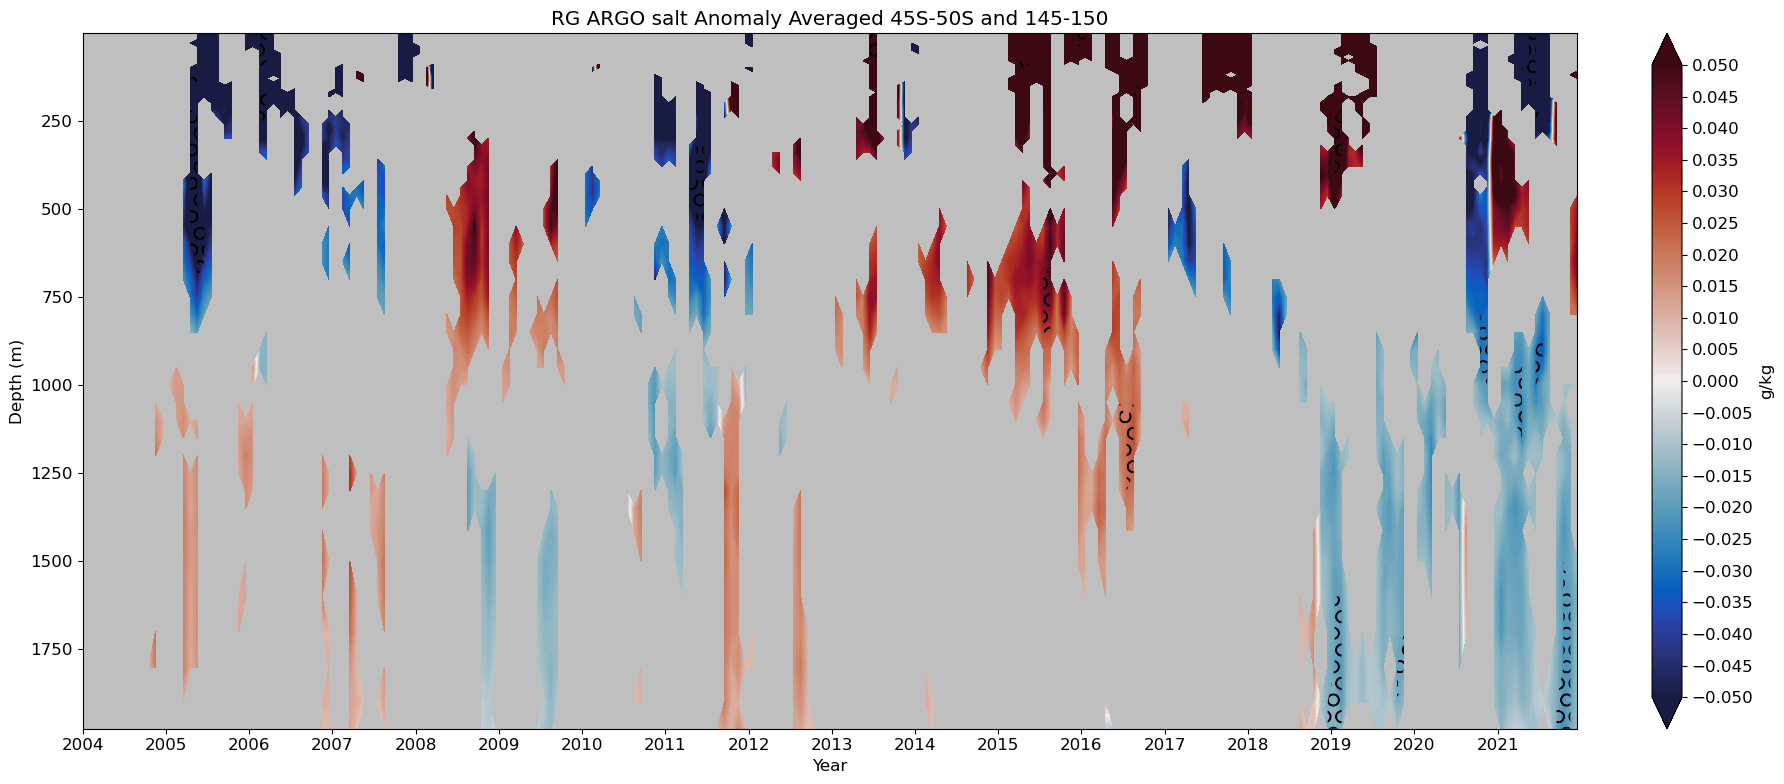

In [17]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.05,0.0505,.0005)
tick_lvls = np.arange(-0.050,.055,.005)

#calc zavg salt ltmm anoms 
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(145,150)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-50,-45)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-50,-45)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s55S_div_std   

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
#p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.75')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 45S-50S and 145-150')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.tight_layout()

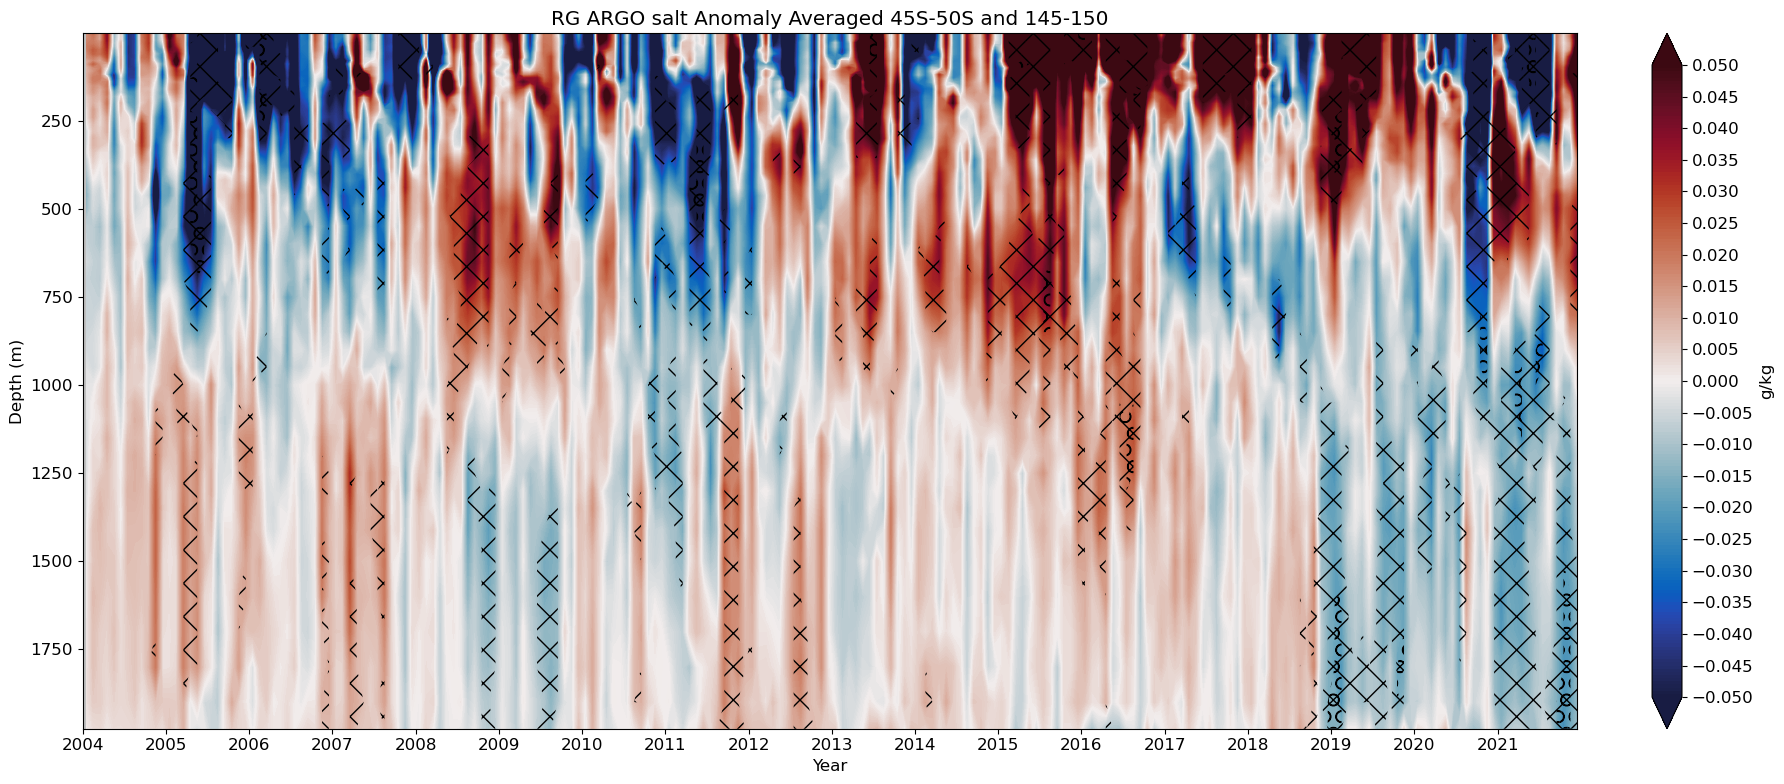

In [19]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.05,0.0505,.0005)
tick_lvls = np.arange(-0.050,.055,.005)

#calc zavg salt ltmm anoms 
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(145,150)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-50,-45)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-50,-45)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s55S_div_std   

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.75')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 45S-50S and 145-150')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.tight_layout()
#plt.savefig('rgargo_salt_0421_anom_ltmm_s55S_zavg_hov.png',dpi=150,bbox_inches='tight')


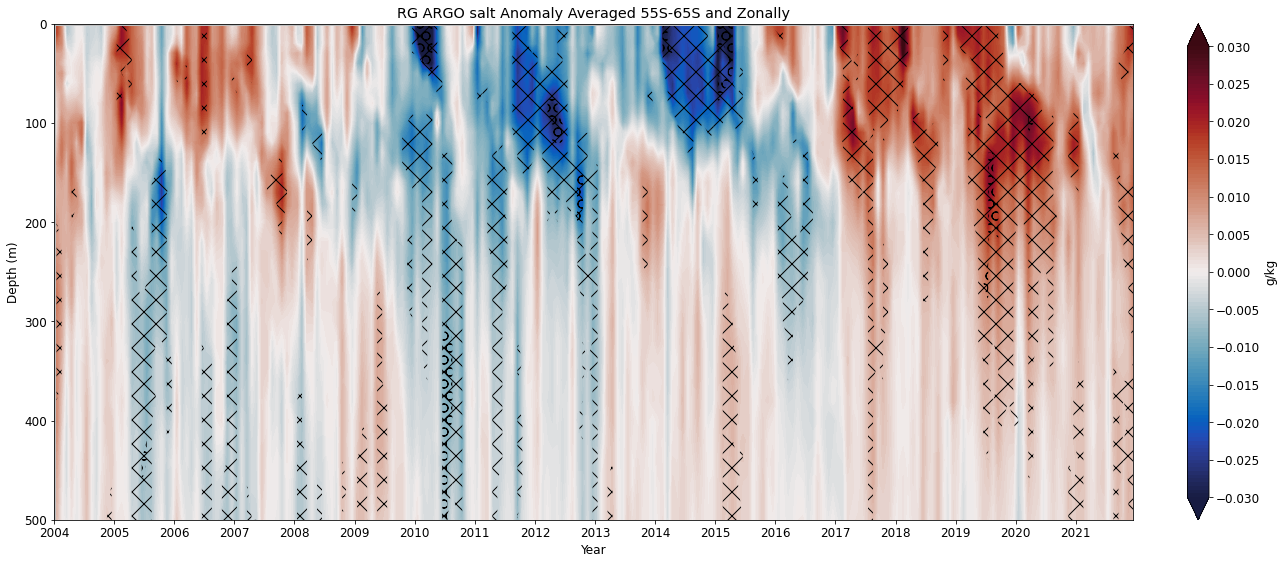

In [26]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.03,0.0305,.0005)
tick_lvls = np.arange(-0.030,.035,.005)

#calc zavg salt ltmm anoms 
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s55S_div_std   

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().patch.set_color('.75')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally')
plt.ylim((0,500))
plt.gca().invert_yaxis()
xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.tight_layout()
plt.savefig('rgargo_salt_0421_anom_ltmm_s55S_zavg_hov.png',dpi=150,bbox_inches='tight')


In [20]:
#average south of 60S for hovmoller
#lat weighted average
salt_zavg_anom_s60S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-60)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-60)).sum()
salt_zavg_anom_s60S=salt_zavg_anom_s60S.where(salt_zavg_anom_s60S!=0,np.NaN).squeeze()
salt_zavg_anom_s60S

<xarray.DataArray (TIME: 216, PRESSURE: 58)>
array([[ 2.21026350e-02,  2.18572628e-02,  1.45865431e-02, ...,
        -6.76712429e-04, -3.53047255e-04,  2.57945756e-04],
       [ 1.08883178e-02,  1.21631879e-02,  1.30377339e-02, ...,
        -1.04765228e-03, -7.69441540e-04, -3.54049555e-05],
       [-4.20895829e-03, -3.33039761e-03, -3.54925910e-04, ...,
        -5.01897314e-04, -1.58241485e-04,  3.63467741e-04],
       ...,
       [ 9.82400365e-03,  1.01888435e-02,  1.08480449e-02, ...,
         7.04028516e-04,  6.00389967e-04,  3.01844593e-06],
       [ 1.75686900e-02,  1.73415260e-02,  1.70286510e-02, ...,
         2.04082713e-03,  1.51453062e-03,  6.80584623e-04],
       [ 2.09041282e-02,  1.85160666e-02,  1.69610347e-02, ...,
         1.49176447e-03,  1.57062556e-03,  1.11537947e-03]])
Coordinates:
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME      (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5
    variable  <U29 '__xarray_dataarray_variable__'

In [21]:
#anom/std
salt_zavg_anom_s60S_div_std=salt_zavg_anom_s60S/salt_zavg_anom_s60S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s60S_div_std                                                

<xarray.DataArray (TIME: 216, PRESSURE: 58)>
array([[ 1.27254629,  1.29054567,  0.91913372, ..., -0.68718392,
        -0.38500568,  0.31686494],
       [ 0.62688853,  0.7181663 ,  0.82153947, ..., -1.06386372,
        -0.83909267, -0.04349205],
       [-0.24232831, -0.19664083, -0.02236475, ..., -0.5096637 ,
        -0.17256577,  0.44648994],
       ...,
       [ 0.56561127,  0.60159262,  0.68356181, ...,  0.7149227 ,
         0.65473827,  0.00370791],
       [ 1.01150706,  1.02391739,  1.07301691, ...,  2.07240702,
         1.65162845,  0.8360417 ],
       [ 1.20354296,  1.09326725,  1.06875623, ...,  1.51484813,
         1.71280119,  1.37015107]])
Coordinates:
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME      (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5
    variable  <U29 '__xarray_dataarray_variable__'

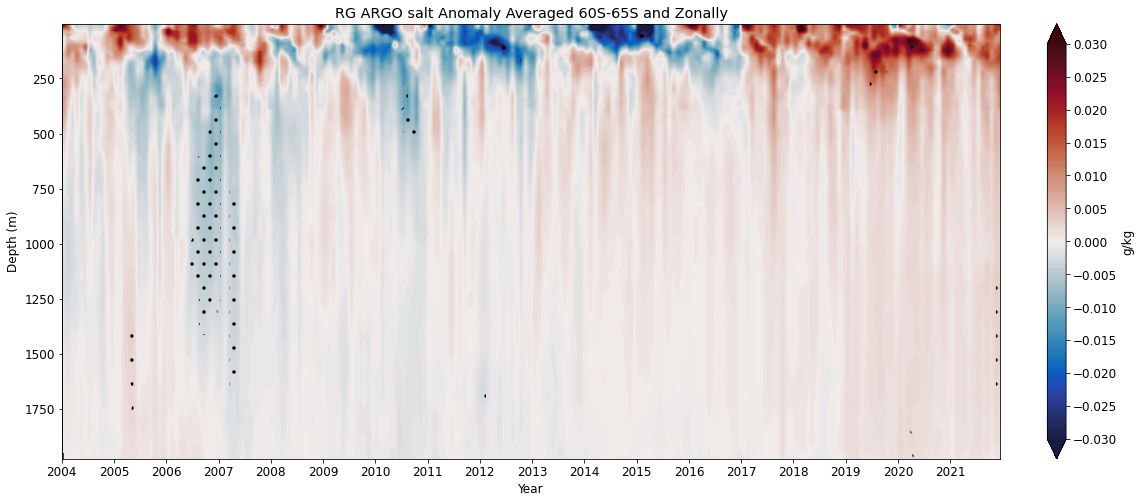

In [22]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.03,0.0305,.0005)
tick_lvls = np.arange(-0.030,.035,.005)

#calc zavg salt ltmm anoms 
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s60S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-60)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-60)).sum()
salt_zavg_anom_s60S=salt_zavg_anom_s60S.where(salt_zavg_anom_s60S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s60S_div_std=salt_zavg_anom_s60S/salt_zavg_anom_s60S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s60S_div_std   

var1= salt_zavg_anom_s60S[:,:]
p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=salt_zavg_anom_s60S_div_std[:,:]
p2=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 60S-65S and Zonally')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.savefig('rgargo_salt_0421_anom_ltmm_s60S_zavg_hov.png',dpi=150,bbox_inches='tight')


In [ ]:
#60-120E (E. Antarctic)
#180-240E (e. Ross-Amundsen)
#270-300 (Bellingshausen)
#300-360 (Weddell)

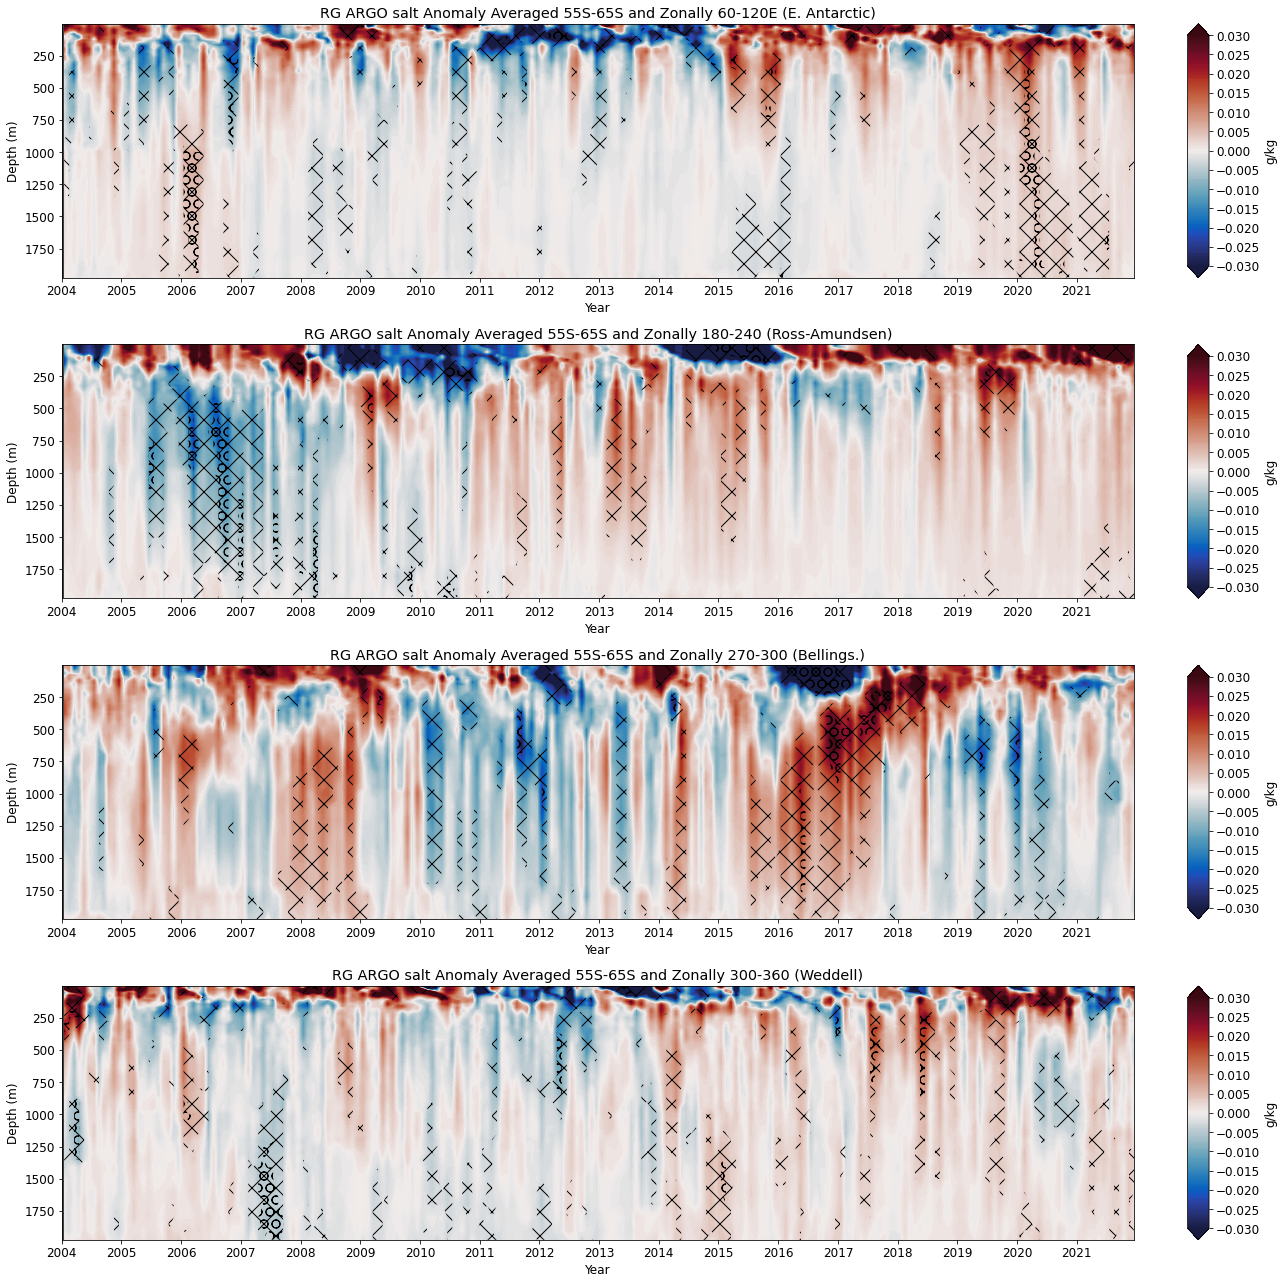

In [23]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,18))

clev = np.arange(-0.03,0.0305,.0005)
tick_lvls = np.arange(-0.030,.035,.005)

plt.subplot(4,1,1)

#calc zavg salt ltmm anoms - E. Antarctica #60-120E (E. Antarctic)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(60,120)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s55S_div_std   

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 60-120E (E. Antarctic)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.subplot(4,1,2)

#calc zavg salt ltmm anoms - #180-240E (e. Ross-Amundsen)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(180,240)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s55S_div_std   

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 180-240 (Ross-Amundsen)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.subplot(4,1,3)

#calc zavg salt ltmm anoms - #270-300 (Bellingshausen)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(270,300)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 270-300 (Bellings.)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')


plt.subplot(4,1,4)

#calc zavg salt ltmm anoms - #300-360 (Weddell)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(300,360)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 300-360 (Weddell)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')
#plt.savefig('rgargo_salt_0421_anom_ltmm_s55S_zavg_Bellings_hov.png',dpi=150,bbox_inches='tight')

plt.tight_layout()
plt.savefig('rgargo_salt_0421_anom_ltmm_s55S_zavg_sectors.png',dpi=150,bbox_inches = 'tight')

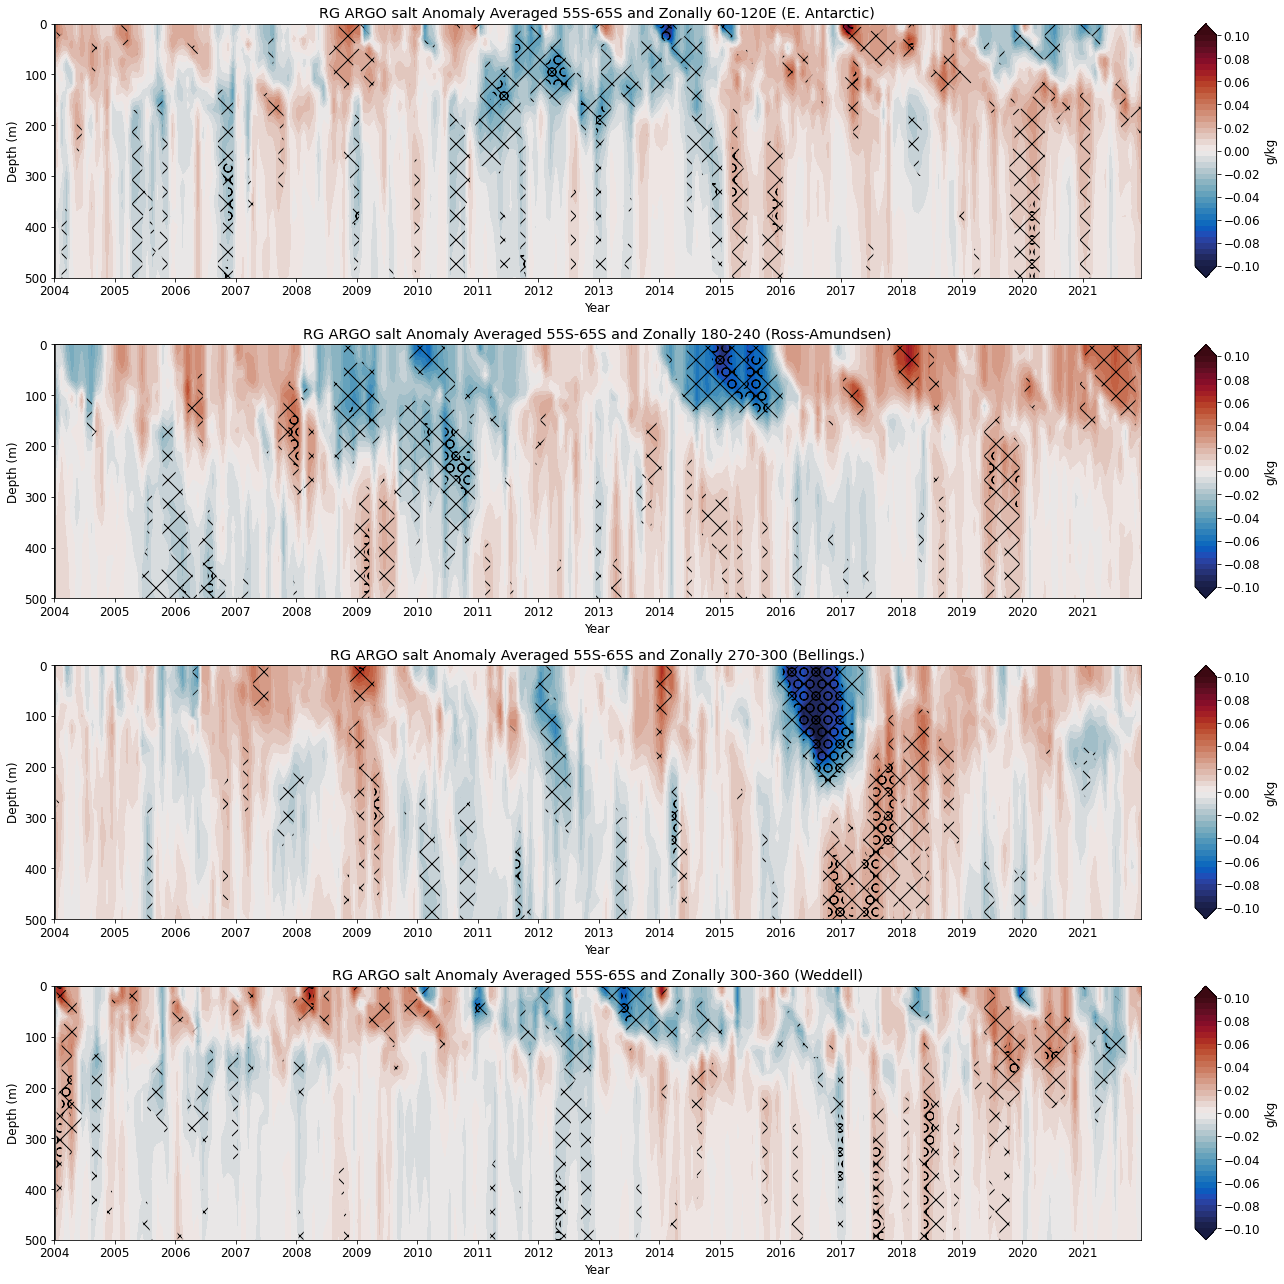

In [28]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,18))

clev = np.arange(-0.1,0.105,.005)
tick_lvls = np.arange(-0.10,.12,.02)

plt.subplot(4,1,1)

#calc zavg salt ltmm anoms - E. Antarctica #60-120E (E. Antarctic)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(60,120)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s55S_div_std   

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.ylim((0,500))
plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 60-120E (E. Antarctic)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.subplot(4,1,2)

#calc zavg salt ltmm anoms - #180-240E (e. Ross-Amundsen)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(180,240)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)
salt_zavg_anom_s55S_div_std   

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.ylim((0,500))
plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 180-240 (Ross-Amundsen)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')

plt.subplot(4,1,3)

#calc zavg salt ltmm anoms - #270-300 (Bellingshausen)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(270,300)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.ylim((0,500))
plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 270-300 (Bellings.)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')


plt.subplot(4,1,4)

#calc zavg salt ltmm anoms - #300-360 (Weddell)
salt_zavg_anom=rgargo_salt_0421_anom_ltmm.sel(LONGITUDE=slice(300,360)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
salt_zavg_anom_s55S=(salt_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
salt_zavg_anom_s55S=salt_zavg_anom_s55S.where(salt_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
salt_zavg_anom_s55S_div_std=salt_zavg_anom_s55S/salt_zavg_anom_s55S.std(axis=0,keep_attrs=True)

var1= salt_zavg_anom_s55S
#monthly mean anom zavg/std
var2=salt_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.ylim((0,500))
plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO salt Anomaly Averaged 55S-65S and Zonally 300-360 (Weddell)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_ylabel('g/kg')
#plt.savefig('rgargo_salt_0421_anom_ltmm_s55S_zavg_Bellings_hov.png',dpi=150,bbox_inches='tight')

plt.tight_layout()
plt.savefig('rgargo_salt_0421_anom_ltmm_s55S_zavg_sectors.png',dpi=150,bbox_inches = 'tight')